X:
 [[ 0.          0.        ]
 [ 0.04754114  0.10042669]
 [ 0.19430537  0.10783384]
 [ 0.30073     0.14377961]
 [ 0.41318927 -0.16372382]
 [ 0.43283728 -0.34827269]
 [ 0.36375587 -0.55868248]
 [-0.05336975 -0.77594455]
 [-0.33050102 -0.82516212]
 [-0.86663368 -0.49894495]
 [-0.         -0.        ]
 [-0.10330734 -0.04090566]
 [-0.2085078   0.07685841]
 [-0.21130483  0.25780105]
 [-0.30905603  0.31939823]
 [-0.05370404  0.55295375]
 [ 0.33059888  0.57892039]
 [ 0.28190978  0.72488975]
 [ 0.88425305  0.09066423]
 [ 0.97379334 -0.22743466]
 [ 0.         -0.        ]
 [ 0.10815965 -0.0254395 ]
 [ 0.1391326  -0.17327676]
 [ 0.13519601 -0.30468533]
 [-0.25259115 -0.36568918]
 [-0.31667388 -0.45646427]
 [-0.61701496 -0.25246184]
 [-0.76535133  0.13847605]
 [-0.80591123  0.37500739]
 [-0.66870584  0.74352706]]
y:
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]


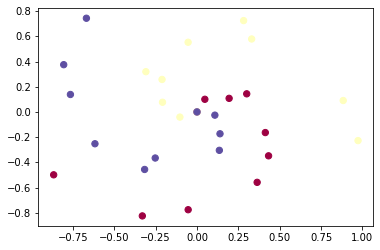

In [ ]:
"""Complete implementation of spiral data-set in 2-dimension. Classification of 
N-number of data-set into 3 class[r,g,y]. We here code a 2-layeres neural 
network using the softmax linear classifier.
"""
import numpy as np
import matplotlib.pyplot as plt
N=10 #number of data-points for each class
D=2 #Dimensionality
K=3 #number of class [r,b,y]
X=np.zeros((N*K,D)) #[300,2]Every data-points(N*K) is converted into D-dimension i.e 2-D 
y=np.zeros((N*K),dtype='uint8') #[300]label or assigning class to every data-point

#1 Genrating the spiral data-set for 3 classes
for j in range(K):        #Looping over the 3 classes
  ix= range(N*j,N*(j+1))  #Dividing the dataset as (0,100) (100,200) (200,300)
  r=np.linspace(0.0,1,N)  #Assigning the radius for every N data-points
  t_0=np.random.randn(N)*0.2 #Theta value I don't know why multiplied by 0.2
  t=np.linspace(j*4,(j+1)*4,N)+ t_0 #linspace divides (start to end)number n times
  """t_1=r*np.sin(t)                #Here (0 to 4) is divided 100 times
  t_2=r*np.cos(t)
  print(t_1)
  print(t_2)"""
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j   #1-D array where all the data-points are assigned with their correct class
              #Here,the data-points from(0,100) is assigned as 0,(100,200) as 1 and(200,300) as 2
print("X:\n",X)
print("y:\n",y)
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c =y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
#2 Initialization of parameters
W=0.01*np.random.randn(D,K) #[2,3]
b=np.zeros((1,K))           #[1,K]

print("W:",W)
#print("b:",b)
"""Iterating over many gardient descent
"""

num_examples=X.shape[0] #300
reg=1e-3 #0.003
step_size=1e-0 #1


for i in range(200):
  scores=np.dot(X,W)+b        #[300,3]
  print("Scores:\n",scores)

#3 Computation of loss
  exp_scores=np.exp(scores)
  exp_sum=np.sum(exp_scores,axis=1,keepdims=True) 
  probs=exp_scores/exp_sum #[300,3]
  print("Probs:\n",probs)

  correct_probs=probs[range(num_examples),y]
  print("Correct probs:\n",correct_probs)
  correct_logprobs= -np.log(correct_probs)
  print("Correct log probs:\n",correct_logprobs) #[300]
  print("The size of correct probs is:",correct_logprobs.shape)

  data_loss=np.sum(correct_logprobs)/num_examples
  print("Data_loss:",data_loss)

  reg_loss= 0.5*reg*np.sum(W*W)
  print("Reg_loss:",reg_loss)                 
  #Compute the total loss
  loss=data_loss + reg_loss
  print("Total loss:",loss)

  if(i%10)==0:
    print("Iteration %d: Loss %f" % (i,loss) )
    
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

# backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)

  dW += reg*W # regularization gradient

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db



Streaming output truncated to the last 5000 lines.
 0.26296344 0.50933729 0.24503817 0.29067835 0.20750969 0.26605093
 0.1402549  0.27907329 0.20193557 0.22452695 0.35097953 0.29770958
 0.39072179 0.79304897 0.28034041 0.30905539 0.51542143 0.40777362
 1.22792234 0.58575793 1.26116681 1.27258622 0.69753727 0.60435211
 0.58622616 1.920053   1.48648975 1.82016719 1.09887047 1.11679028
 1.13095902 1.1728331  1.18963814 1.18166454 1.19535593 1.25445802
 1.25942873 1.25969388 1.27959885 1.30981168 1.28228966 1.30038883
 1.37013519 1.29231003 1.23460577 1.174836   1.20360441 1.36492018
 1.24029687 1.37556343 1.35318122 1.40621032 1.20979114 1.2064714
 1.26658089 1.19393372 1.02455442 1.2660198  1.01035685 1.07611919
 1.05653184 1.15141357 1.19714746 0.8864391  0.80312464 1.13816138
 0.63613696 0.97274019 0.89919266 0.72269535 0.70323779 0.73891641
 0.81726395 0.9560012  0.4437681  0.69765814 0.47755259 0.52877451
 0.35472739 0.27245723 0.36640844 0.49481703 0.28576911 0.27783354
 0.23852904 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 0.14954672 0.16960885 0.13787113 0.15595842 0.14972388 0.16324347
 0.21101977 0.46909161 0.19411463 0.23963534 0.15856571 0.21572811
 0.09571045 0.22917935 0.15459588 0.17639741 0.30269212 0.24871153
 0.34437623 0.79087294 0.23196269 0.26085408 0.47855547 0.36303133
 1.30126451 0.55635533 1.34070329 1.35423639 0.68213856 0.57726828
 0.55712657 2.12488519 1.60837337 2.00578253 1.11771786 1.1388784
 1.15549165 1.20622999 1.22598836 1.21546282 1.23158378 1.30345098
 1.30879163 1.30848451 1.33228602 1.36875227 1.33458835 1.35622774
 1.44110128 1.34566036 1.27549437 1.20329951 1.2377095  1.43275323
 1.28157089 1.44518516 1.41778382 1.48200783 1.24432009 1.24022985
 1.31247357 1.22499876 1.0230865  1.31150831 1.00621313 1.08403915
 1.06073596 1.17364366 1.2283202  0.86087408 0.76475739 1.15751285
 0.57691109 0.96143334 0.87543555 0.67326998 0.6513873  0.69146855
 0.78055702 0.94125699 0.37177273 0.64488917 0.40667911 0.46050811
 0.2826075  

In [ ]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.52


(-1.877409582043497, 1.9025904179565063)

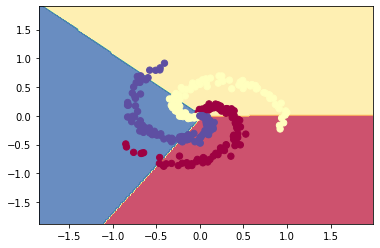

In [ ]:
# plot the resulting classifier "You need to understand this"
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')